# Regresion lineal Costo de un incidente de seguridad

EN este ejercicio se explican los fundamentos básicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad.

## Enunciado del ejercicio

El ejercicio consiste en predecir el costo d eun insidente de seguridad en base al número de equipos que se han visto afectados. EL conjunto de datos es generado de manera aleatoria.


# 1.- Generacion del DataSet

In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))


La longitud del DataSet es:  100


# 2.- Visualización del DataSet

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline

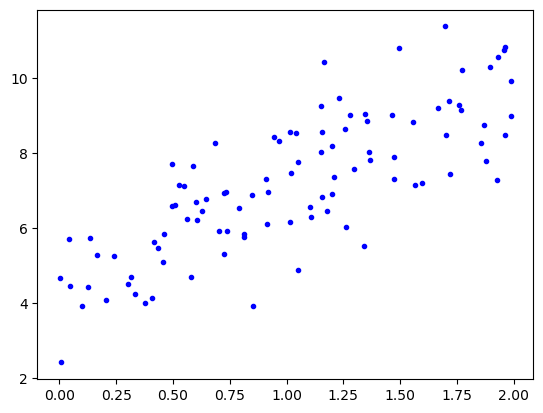

In [6]:
plt.plot(X, y, "b.")
plt.show()

es discreta por que; linealidad, elasticidad, homoseaseidad 

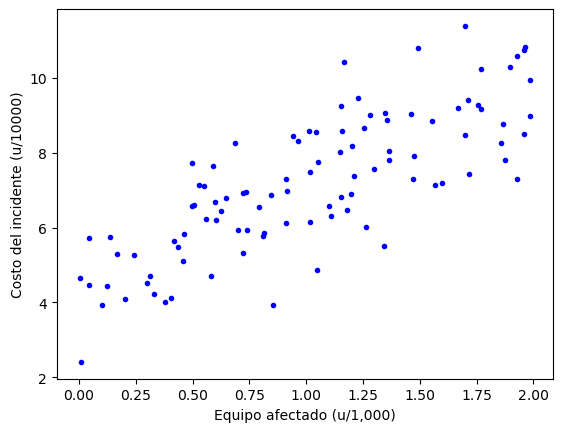

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("Equipo afectado (u/1,000)")
plt.ylabel("Costo del incidente (u/10000)")
plt.show()

# 3.- Modificacion del DataSet

In [10]:
import pandas as pd

In [11]:
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.701236,8.475888
1,1.929604,10.585663
2,1.595992,7.197774
3,0.241840,5.263196
4,1.179041,6.461128
5,1.048101,4.877040
6,1.297849,7.572747
7,0.604383,6.212582
8,1.877291,7.805553
9,1.770687,10.237105


In [12]:
# Escalado del Numero de equipos afectados 
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,1701,84758
1,1929,105856
2,1595,71977
3,241,52631
4,1179,64611
5,1048,48770
6,1297,75727
7,604,62125
8,1877,78055
9,1770,102371


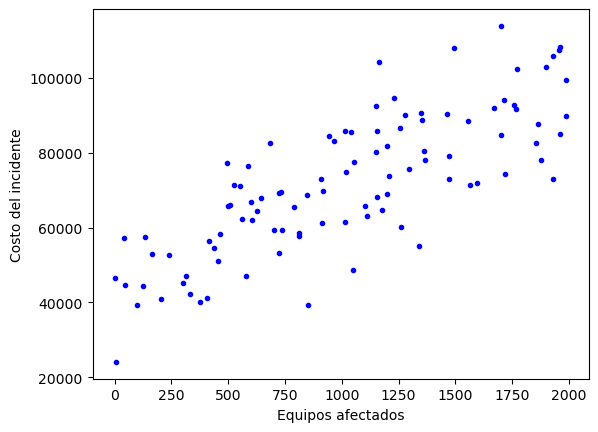

In [13]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 4.- Cronstruccion del modelo

calcula todas las funciones de hipotesis por dato (fit se queda con el que mejor se ajuste) la funcion de hipotesis es la que mejor se ajusta, la misma distancia del punto mas alto a mas bajo de la funcion de hipotesis 
train fit, hacer regresiones lineales es mala idea, por que das todos los datos (overfiting), hay modelos matematicos para no caer en overfiting 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Construccion del modelo y ajuste de la funcion de hipotesis 
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1,1), df['Costo'].values)

LinearRegression()

In [18]:
# Parametro Tetha 0 
lin_reg.intercept_

44790.2726503155

In [19]:
# Parametro Tetha 1 
lin_reg.coef_

array([26.4667849])

In [20]:
# Pedriccion para el valor minimo y maximo para el conjunto de datos de entrenamiento 
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

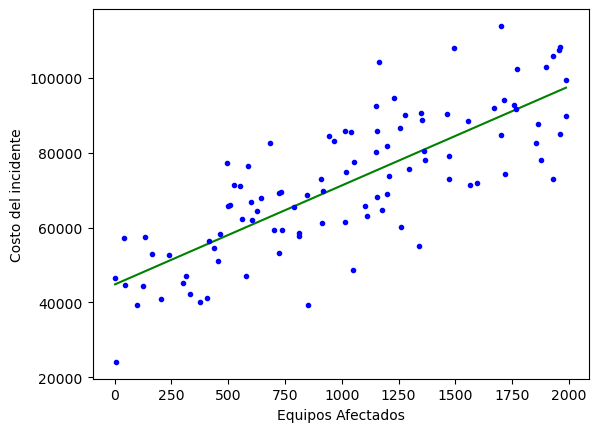

In [21]:
# Representacion grafic de la funcion de hipotesis generda.
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df ['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos

In [48]:
x_new = np.array([[2700]]) # Numero de equipos afectados
# Prediccion de costo del incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(Costo[0]))

El costo del incidente seria: $ 116250


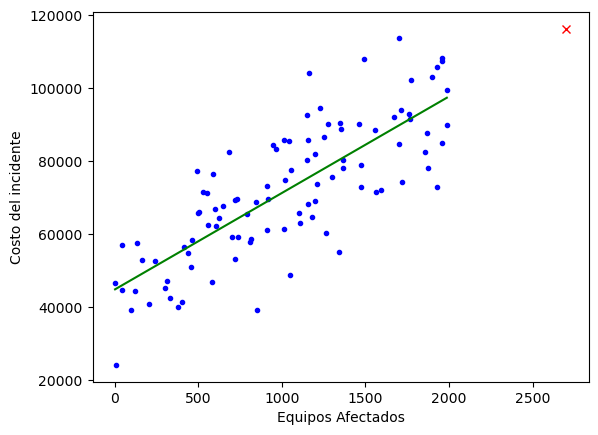

In [50]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()